<a id='top'></a>
# Introduction to Time Series

<center>
<img src='https://memegenerator.net/img/instances/81204821/im-afraid-we-need-to-use-math.jpg'>
</center>

_____

## References / Further Reading

* [Time Series Text](http://db.ucsd.edu/static/TimeSeries.pdf)

* [More on Time Series](https://otexts.com/fpp2/components.html)

* [Dynamic Time Warping Slide-Deck](https://www.cs.unm.edu/~mueen/DTW.pdf)

* [Self-Similarity Slide-Deck](https://www.cs.unm.edu/~mueen/Tutorial/CIKM2016Tutorial.pdf)

<center>
<img src='https://memegenerator.net/img/instances/71458205/when-did-you-become-an-expert-on-time-series-analysis-and-autoregression-models-last-night.jpg
'>
</center>

_____

## Time Series Models




### Models for Stochastic Processes

* Autoregressive (AR) Models,

$$
y_t = \mu_t 
    + \varphi_1 y_{t-1} + \varphi_2 y_{t-2} + \cdots + \varphi_p y_{t-p} 
    + \epsilon_t
$$

* Moving Average (MA) Models,

$$
y_t = \mu_t + \epsilon_t
    + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + + \theta_q \epsilon_{t-q}    
$$

* Autoregressive Moving Average (ARMA) Models,

$$
y_t = c + \varphi_1 y_{t-1} + \varphi_2 y_{t-2} + \cdots + \varphi_p y_{t-p} + \epsilon_t
        + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + + \theta_q \epsilon_{t-q}
$$

* Autoregressive Integrated Moving Average (ARIMA) Models,

$$
x_t = c + \varphi_1 x_{t-1} + \varphi_2 x_{t-2} + \cdots + \varphi_p x_{t-p} + \epsilon_t
        + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + + \theta_q \epsilon_{t-q}
$$
$$
\textrm{with} 
$$
$$
x_t = D_d(y_t) = D_{d-1}\big(D_1(y_t)\big) = D_{d-1}\big(y_t - y_{t-1}\big) = \cdots = y_t - d y_{t-1} + \frac{d(d-1)}{2} y_{t-2} - \cdots + (-1)^d y_{t-d} 
$$

<center>
<img src='http://customerthink.com/wp-content/uploads/2-tmi.jpg'>
</center>

* Seasonal Autoregressive Integrated Moving Average (sARIMA) Models,

* Autoregressive Frationally Integrated Moving Average (ARFIMA) Models,

* Vector (V) Models (such as Vector Autoregression (VAR)),

* Exogenous (X) Models (such as ARIMAX),

* etc.

### Models for Heteroskedastic Processes
*Note:* Models which capture the changes of variance over time, i.e. $\sigma^2_t \sim t$.

* Autoregressive Conditional Heteroskedasticity (ARCH),
* GARCH ('G' is for Generalized -from Engle (2003 Nobel Prize Winner) in 1982),
* GARCH-m ('m' is for "-in-mean"),
* TARCH ('T' is for Threshold),
* EGARCH ('E' is for Exponential),
* FIGARCH ('FI' is for Fractionally Integrated),
* CGARCH ('C' is for Component),
* etc.

### Recent Advances

* Wavelet-based Methods,

* Autoencoder-based Methods,

* Model-free Techniques and Hybrid Models,

* Dynamic Bayesian Networks (Hidden Markov Model (HMM) is the simplest example),

* Recurrent Neural Networks (RNN) such as:
    * Long Short-Term Memory (LSTM) Networks,
    * Gated Recurrent Unit (GRU) Networks,
    * etc.

<center>
<img src='https://i.pinimg.com/736x/0e/15/f8/0e15f8f3c42b54b9403c79f5f4d526d9--funny-cartoons-funny-memes.jpg'>
</center>
    
_____

## Table of Contents

[Back to Top](#top)

* [Basic Facts](#facts)

* [Import Libraries](#import)

* [Quick Glimpse at our Data](#data)

* [Recap](#recap)

* [Forcing Stationarity](#stationarity)
    * [Log-Scale Transformation](#log),
    * [Smoothing Transformations](#smooth),
    * [Difference Tranformation](#diff)
    
* [ACF & PACF](#acf)

* [Modeling & Parsimony](#model)

* [Forecasting](#forecast)

<center>
<img src='http://i.lvme.me/7erw65d.jpg'>
</center>

______

<a id='facts'></a>
## Basic Facts

[Back to Top](#top)

1. **Time Series** is a collection of observations (data) made sequentially (or 'in time'). They are broken down into four components:
    * The Major Trend,
    * Seasonal,
    * Cyclical,
    * Irregular (Noise).
    
2. **Time Series** analysis is used in retail, marketing, e-commerce, fraud detection, astro-physics (e.g. exoplanet detection), finance (e.g. stocks, funds, options, etc.), oil and gas (e.g. plunger well SCADA measurements, etc.), and --in general-- any sensor-based data.  

<center>
<img src='https://memegenerator.net/img/instances/80814038/and-they-say-pure-math-has-no-real-life-applications.jpg'>
</center>
    
3. **Stationarity** is a desirable property for time series. We say a time series is stationary if:
    * it has a constant mean (with respect to time),
    
    ![](stat1.png)
    * it has a constant variance (with respect to time),
    
    ![](stat2.png)
    * it has an auto-covariance which is not time dependent.
    
    ![](stat3.png)
    
4. If a time series has a **trend** or behaves with some **seasonal** regularity, then it is not stationary.

5. There are multiple ways to check if a time series is stationary:
    * Visually check: plot a moving average or rolling median (if there are outliers) to see if there is a relationship to time,
    * **Augumented Dickey-Fuller test**: this is a hypothesis test (we reject the null hypothesis that a time series is non-stationary if the test-statistic is less than the critical value),
    * and various other (data-specific) techniques.
    
6. TO BE CONTINUED...

_____

<a id='import'></a>
## Import Libraries

[Back to Top](#top)

In [323]:
import pandas as pd # read_csv, datetime, DataFrame
import numpy as np # random.normal, sin

from pandas.plotting import autocorrelation_plot as auto_corr

from matplotlib import pyplot as plt # for plotting
import seaborn as sns; sns.set() # for prettier plots / formatting / style

# jupyter cell magic for inline visualization
%matplotlib inline 

# tsa : time series analysis
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose as season
from statsmodels.tsa.arima_model import ARIMA

# metrics
from sklearn import metrics # explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
#from sklearn.utils import check_arrays # converts list-like objects to array (if needed)

# scikit-learn models
from sklearn.linear_model import LinearRegression as LinReg

In [324]:
# define a constant for figsize
SIZE = (10,6) # 10/6 is a good enough approximation of the golden ratio ~ 1.618

In [325]:
# MAPE: Mean Absolute Percentage Error 
## another useful metric --not implemented in sklearn.metrics
## See: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

def MAPE(y_true, y_pred): 
#     y_true, y_pred = check_arrays(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [326]:
def report_metrics(y_true, y_pred):
    print("Explained Variance:\n\t", metrics.explained_variance_score(y_true, y_pred))
    print("MAE:\n\t", metrics.mean_absolute_error(y_true, y_pred))
    print("RMSE:\n\t", np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    print("MAPE:\n\t", MAPE(y_true, y_pred))
    print("r^2:\n\t", metrics.r2_score(y_true, y_pred))

<a id='data'></a>
## Toy Dataset

[Back to Top](#top)

<center>
<img src='https://i.pinimg.com/originals/2a/66/ac/2a66acfdd713e7fc176e030f1e5bdb97.jpg'>
</center>


In [327]:
t = np.array(range(100))

x = 2*np.sin(2*np.pi*t/10) \
    + 0.25*t \
    + 0.72*np.sqrt(t) \
    + np.random.normal(12,1,100) 

# DESCRIPTION (of x):
# forcing some seasonality with a sinusoidal 
# adding a linear trend component 
# adding a non-linear trend component  
# injecting some noise  

df = pd.DataFrame(t, columns=['t'])
df['x'] = x

df['past'] = (df.t < 75).astype(np.int)
df['future'] = 1 - df.past

In [328]:
df.head().append(df.tail())

,t,x,past,future
0,0,12.787618,1,0
1,1,15.445464,1,0
2,2,15.225609,1,0
3,3,16.816631,1,0
4,4,14.787355,1,0
95,95,42.012881,0,1
96,96,40.283272,0,1
97,97,40.343230,0,1
98,98,40.442116,0,1
99,99,41.641448,0,1


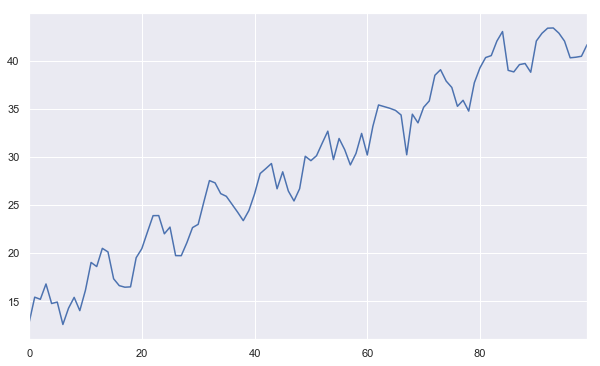

In [329]:
plt.figure(figsize=SIZE)
df['x'].plot()
plt.show()

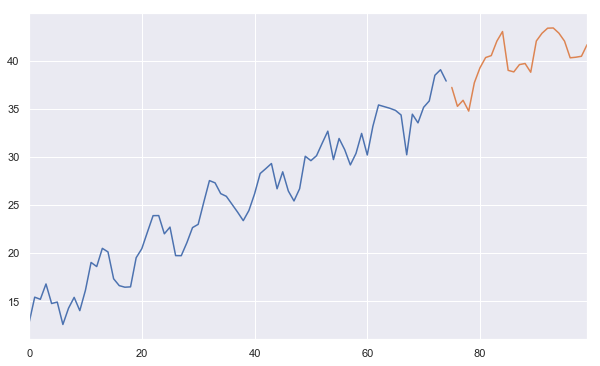

In [330]:
plt.figure(figsize=SIZE)
df.loc[df.past == 1, 'x'].plot()
df.loc[df.future == 1, 'x'].plot()
plt.show()

In [331]:
# How would you model this?

X_train = df.loc[df.past == 1, 't'].values.reshape(-1, 1)
X_test = df.loc[df.future == 1, 't'].values.reshape(-1, 1)
y_train = df.loc[df.past == 1, 'x'].values
y_test = df.loc[df.future == 1, 'x'].values

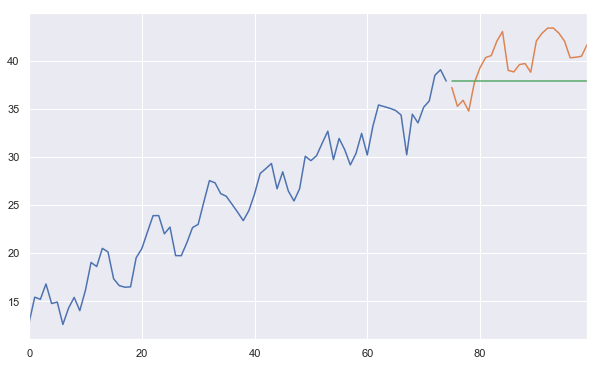

In [332]:
# naive approach

y_pred = y_train[len(y_train)-1]
y_pred = [y_pred]*25

plt.figure(figsize=SIZE)
df.loc[df.past == 1, 'x'].plot()
df.loc[df.future == 1, 'x'].plot()
plt.plot(X_test, y_pred)
plt.show()

In [333]:
report_metrics(y_test, y_pred)

Explained Variance:
	 -2.220446049250313e-16
MAE:
	 2.851202101413021
RMSE:
	 3.2598290294006893
MAPE:
	 6.980383954343947
r^2:
	 -0.7895867474833131


In [334]:
# linear trend approach

lr = LinReg(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_trend = lr.predict(X_train)

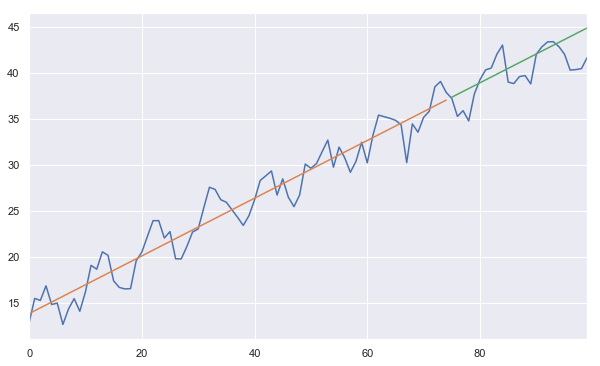

In [335]:
plt.figure(figsize=SIZE)
df['x'].plot()
plt.plot(X_train, y_trend)
plt.plot(X_test, y_pred)
plt.show()

In [336]:
report_metrics(y_test, y_pred)

Explained Variance:
	 0.39696870753450775
MAE:
	 1.7857398885528724
RMSE:
	 2.172782906566232
MAPE:
	 4.525392079954683
r^2:
	 0.20494754828944706


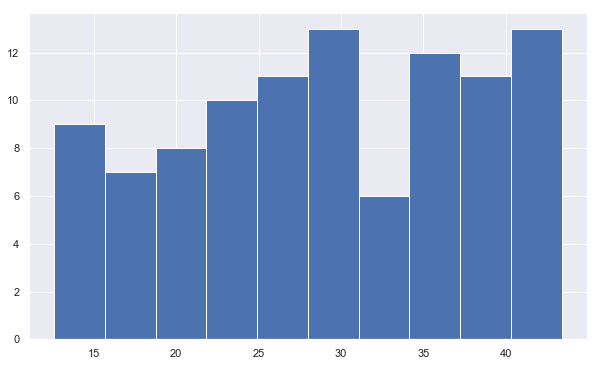

In [337]:
plt.figure(figsize=SIZE)
df.x.hist()
plt.show()

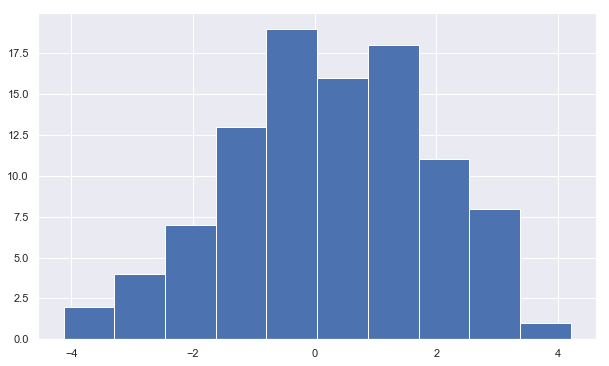

In [338]:
# what if we difference?

plt.figure(figsize=SIZE)
df.x.diff().hist()
plt.show()

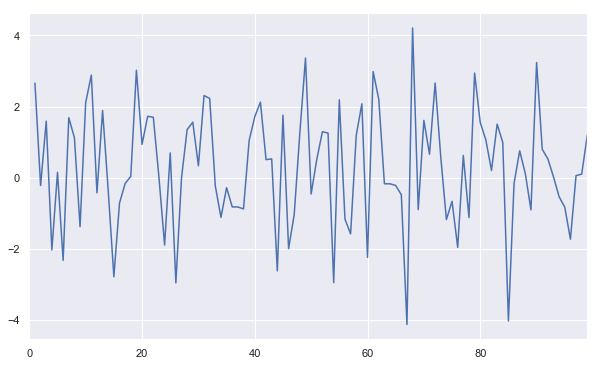

In [339]:
# does this look (more) stationary?

plt.figure(figsize=SIZE)
df.x.diff().plot()
plt.show()

In [340]:
# is this easier to predict?

df['x_diff'] = df.x.diff()
y_train = df.loc[df.past == 1, 'x_diff'].fillna(0).values
y_test = df.loc[df.future == 1, 'x_diff'].values

lr = LinReg(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_trend = lr.predict(X_train)

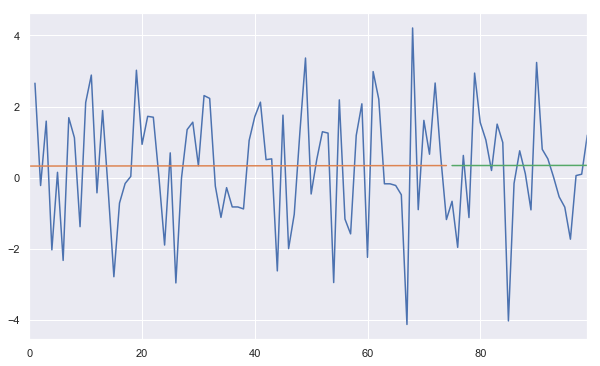

In [341]:
plt.figure(figsize=SIZE)
df['x_diff'].plot()
plt.plot(X_train, y_trend)
plt.plot(X_test, y_pred)
plt.show()

In [342]:
def rebuild_diffed(diffed_series, first_element_original):
    cumsum = pd.Series(diffed_series).cumsum()
    return cumsum.fillna(0) + first_element_original

In [343]:
y_train = rebuild_diffed(y_train, df.x[0])
y_trend = rebuild_diffed(y_trend, df.x[0])
y_test = rebuild_diffed(y_test, y_train[len(y_train)-1])
y_pred = rebuild_diffed(y_pred, y_train[len(y_train)-1])

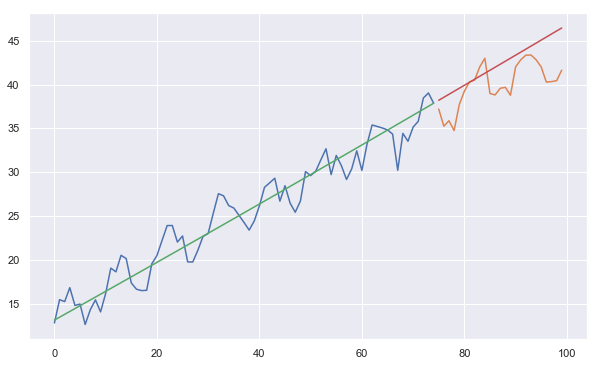

In [344]:
plt.figure(figsize=SIZE)
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.plot(X_train, y_trend)
plt.plot(X_test, y_pred)
plt.show()

In [345]:
report_metrics(y_test, y_pred)

Explained Variance:
	 0.3430771224350654
MAE:
	 2.521183416710746
RMSE:
	 3.027934288253023
MAPE:
	 6.401866492093877
r^2:
	 -0.5440309484627663


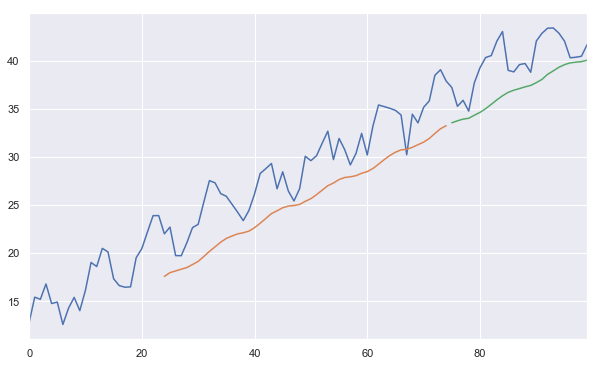

In [346]:
# smoothing approach

df['MA_25'] = df.x.rolling(window=25).mean()

plt.figure(figsize=SIZE)
df.x.plot()
df.loc[df.past == 1, 'MA_25'].plot()
df.loc[df.future == 1, 'MA_25'].plot()
plt.show()

In [347]:
y_pred = df.loc[df.future == 1, 'MA_25']

report_metrics(y_test, y_pred)

Explained Variance:
	 0.46049904600249425
MAE:
	 3.079600938711376
RMSE:
	 3.5619480970861104
MAPE:
	 nan
r^2:
	 -1.1366740862385143


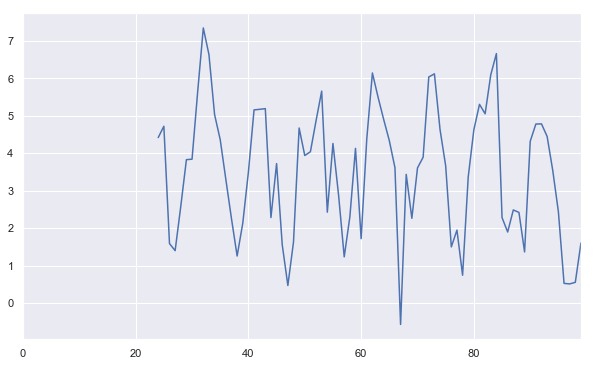

In [348]:
# does this look (more) stationary?

plt.figure(figsize=SIZE)
(df.x - df.x.rolling(window=25).mean()).plot()
plt.show()

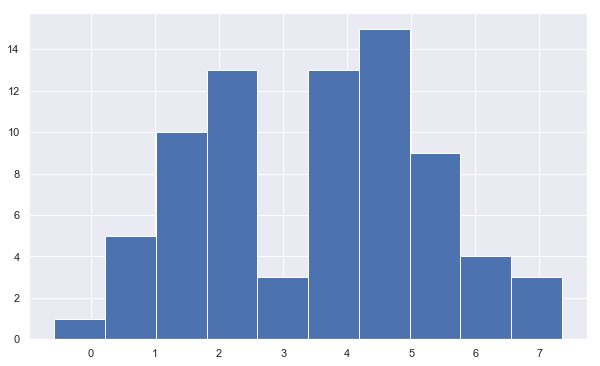

In [349]:
plt.figure(figsize=SIZE)
(df.x - df.x.rolling(window=25).mean()).hist()
plt.show()

In [350]:
# lag approach

df['lag_1'] = df.x.shift()
df.head()

,t,x,past,future,x_diff,MA_25,lag_1
0,0,12.787618,1,0,NaN,NaN,NaN
1,1,15.445464,1,0,2.657846,NaN,12.787618
2,2,15.225609,1,0,-0.219855,NaN,15.445464
3,3,16.816631,1,0,1.591021,NaN,15.225609
4,4,14.787355,1,0,-2.029275,NaN,16.816631


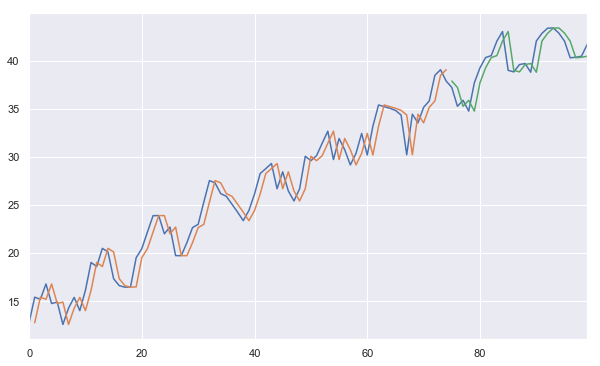

In [351]:
plt.figure(figsize=SIZE)
df.x.plot()
df.loc[df.past == 1, 'lag_1'].plot()
df.loc[df.future == 1, 'lag_1'].plot()
plt.show()

In [352]:
y_pred = df.loc[df.future == 1, 'lag_1']

report_metrics(y_test, y_pred)

Explained Variance:
	 0.6271621006182335
MAE:
	 1.1053770453202778
RMSE:
	 1.495542856893972
MAPE:
	 nan
r^2:
	 0.6233301709888501


In [353]:
# what if we combine different ideas?

df.head()

,t,x,past,future,x_diff,MA_25,lag_1
0,0,12.787618,1,0,NaN,NaN,NaN
1,1,15.445464,1,0,2.657846,NaN,12.787618
2,2,15.225609,1,0,-0.219855,NaN,15.445464
3,3,16.816631,1,0,1.591021,NaN,15.225609
4,4,14.787355,1,0,-2.029275,NaN,16.816631


In [354]:
df_clean = df.dropna()
df_clean.head()

,t,x,past,future,x_diff,MA_25,lag_1
24,24,22.018870,1,0,-1.894151,17.596873,23.913022
25,25,22.717414,1,0,0.698543,17.994065,22.018870
26,26,19.757864,1,0,-2.959550,18.166561,22.717414
27,27,19.750300,1,0,-0.007563,18.347549,19.757864
28,28,21.103915,1,0,1.353615,18.519040,19.750300


In [355]:
X_train = df_clean.loc[df_clean.past == 1, ['t', 'MA_25', 'lag_1']].values
X_test = df_clean.loc[df_clean.future == 1, ['t', 'MA_25', 'lag_1']].values
y_train = df_clean.loc[df_clean.past == 1, 'x'].values
y_test = df_clean.loc[df_clean.future == 1, 'x'].values

lr = LinReg(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_trend = lr.predict(X_train)

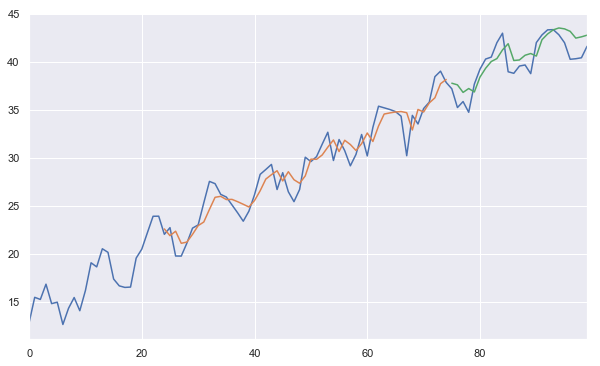

In [356]:
plt.figure(figsize=SIZE)
df['x'].plot()
plt.plot(X_train[:, 0], y_trend)
plt.plot(X_test[:, 0], y_pred)
plt.show()

In [357]:
report_metrics(y_test, y_pred)

Explained Variance:
	 0.6539256390817219
MAE:
	 1.3521108574051828
RMSE:
	 1.5721173577700895
MAPE:
	 3.433725619421861
r^2:
	 0.5837703299564729


<a id='recap'></a>
## Recap

[Back to Top](#top)

By just fiddling around with some different approaches, we have accidentally built a tool-kit for constructing ARIMA models:

* trends,

* differences,

* moving averages,

* lags.

But our approach up to this point has been very haphazard. Now we will get a little more rigorous and systematic in our approach.

<center>
<img src='https://memegenerator.net/img/instances/61167552/playtimes-over-lets-get-down-to-business.jpg'>
</center>


In [361]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.figure(figsize=SIZE)
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [362]:
# start fresh

df = pd.DataFrame(t, columns=['t'])
df['x'] = x

df['past'] = (df.t < 75).astype(np.int)
df['future'] = 1 - df.past

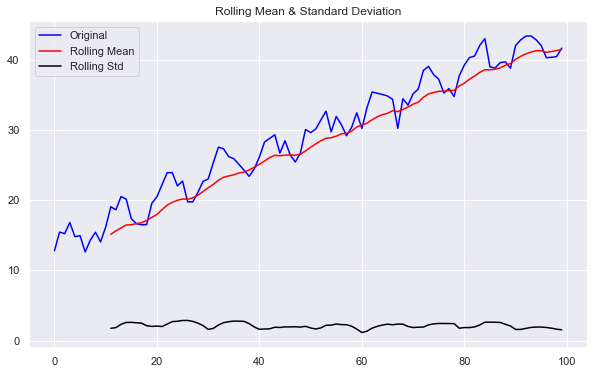

Results of Dickey-Fuller Test:
Test Statistic                 -2.442874
p-value                         0.129999
#Lags Used                     10.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [363]:
test_stationarity(df.x)

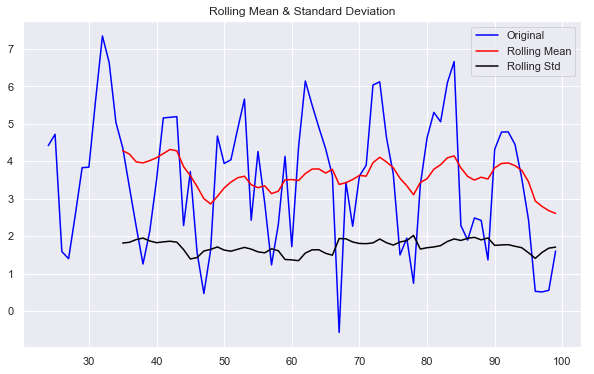

Results of Dickey-Fuller Test:
Test Statistic                 -1.155790
p-value                         0.692319
#Lags Used                      8.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


In [364]:
test_stationarity((df.x - df.x.rolling(window=25).mean()).dropna())

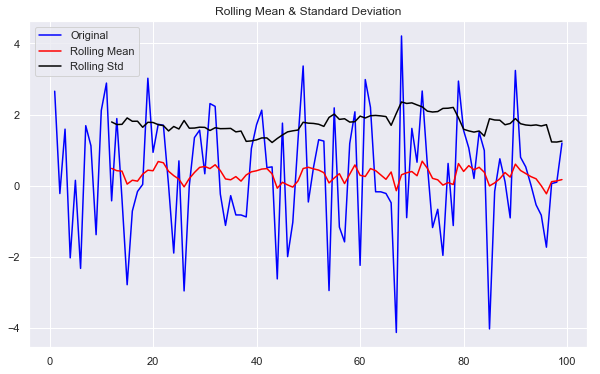

Results of Dickey-Fuller Test:
Test Statistic                -9.875451e+00
p-value                        3.893504e-17
#Lags Used                     7.000000e+00
Number of Observations Used    9.100000e+01
Critical Value (1%)           -3.504343e+00
Critical Value (5%)           -2.893866e+00
Critical Value (10%)          -2.584015e+00
dtype: float64


In [365]:
test_stationarity(df.x.diff().dropna())

In [366]:
dx = df.x.diff().dropna()

In [367]:
# YAY!

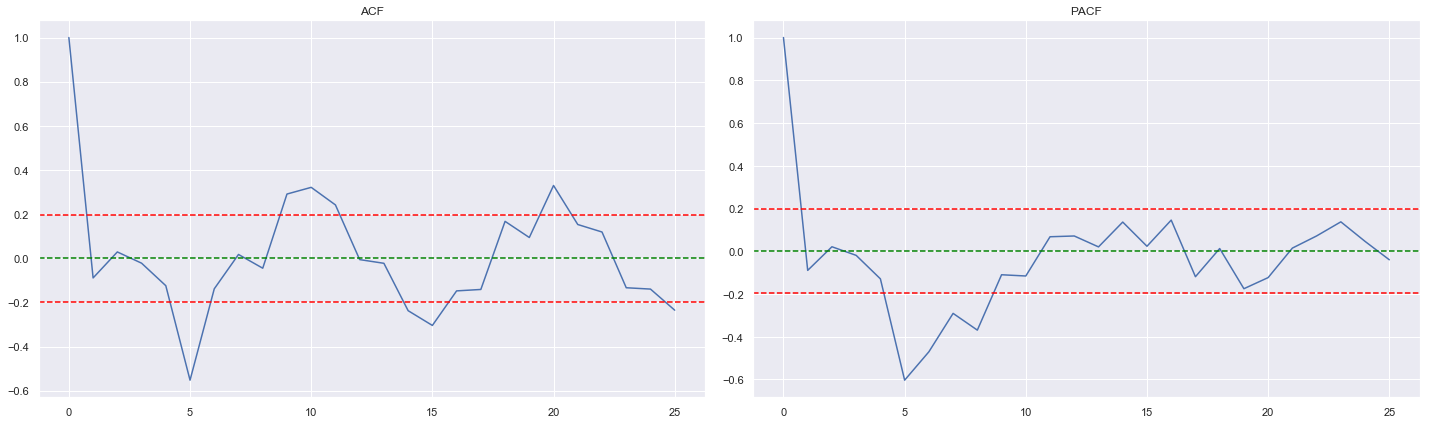

In [368]:
#ACF & PACF plots

lag_acf = acf(dx, nlags=25)
lag_pacf = pacf(dx, nlags=25, method='ols')

plt.figure(figsize=(20,6))
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='green')
plt.axhline(y=-1.96/np.sqrt(len(dx)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(dx)), linestyle='--', color='red')
plt.title('ACF')            

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='green')
plt.axhline(y=-1.96/np.sqrt(len(dx)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(dx)), linestyle='--', color='red')
plt.title('PACF')
            
plt.tight_layout()
plt.show()

In [369]:
print(lag_acf)

[ 1.         -0.0891709   0.02850195 -0.02236878 -0.12438335 -0.55242842
 -0.13848233  0.01715333 -0.0451765   0.29086624  0.32118706  0.24157591
 -0.00615822 -0.02291704 -0.23760645 -0.30446748 -0.14791022 -0.14143801
  0.16717821  0.0939606   0.32969842  0.15283514  0.1188575  -0.13368416
 -0.13973558 -0.23532816]


In [370]:
print(lag_pacf)

[ 1.         -0.0895216   0.02097075 -0.01930781 -0.12923205 -0.60330509
 -0.47058897 -0.29078216 -0.36914958 -0.11004244 -0.11585927  0.06780712
  0.07135745  0.02032188  0.13651764  0.02329363  0.14569171 -0.11919669
  0.01261105 -0.17535649 -0.12332224  0.01470103  0.07157435  0.13754694
  0.04602773 -0.03991581]


In [371]:
# q = 1;   p = 1 --maybe?
# q = 7,8; p = 5 --maybe?
# more is probably too complicated... so stopping here...

# Summary
# =======
# Potential Models are ARIMA(p,d,q) with:
#  * p=1, d=1, q=1,
#  * p=1, d=1, q=7,
#  * p=1, d=1, q=8,
#  * p=5, d=1, q=1,
#  * p=5, d=1, q=7,
#  * p=5, d=1, q=8,

C:\Users\purem\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\purem\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\purem\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

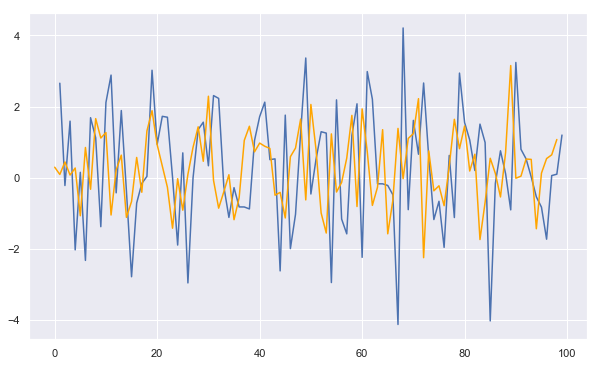

In [372]:
# Just for demonstration:
# Let's do an AR Model on dx...

# Note: d=1 implies we have a single difference (so x becomes dx)
model = ARIMA(x, order=(5,1,0))
results_AR = model.fit(disp=-1)

plt.figure(figsize=SIZE)
plt.plot(dx)
plt.plot(results_AR.fittedvalues, color='orange')
plt.show()

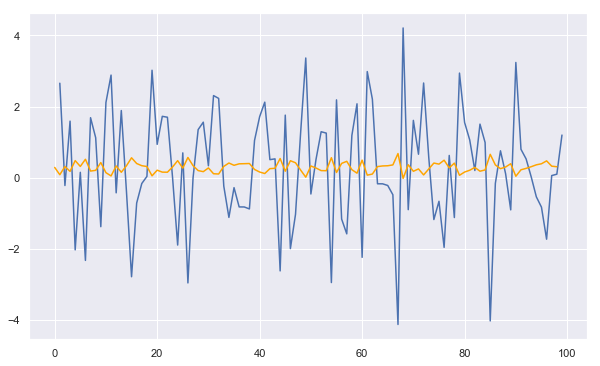

In [373]:
# Just for demonstration:
# Let's do a MA Model on dx...

# Note: d=1 implies we have a single difference (so x becomes dx)
model = ARIMA(x, order=(0,1,1))
results_MA = model.fit(disp=-1)

plt.figure(figsize=SIZE)
plt.plot(dx)
plt.plot(results_MA.fittedvalues, color='orange')
plt.show()

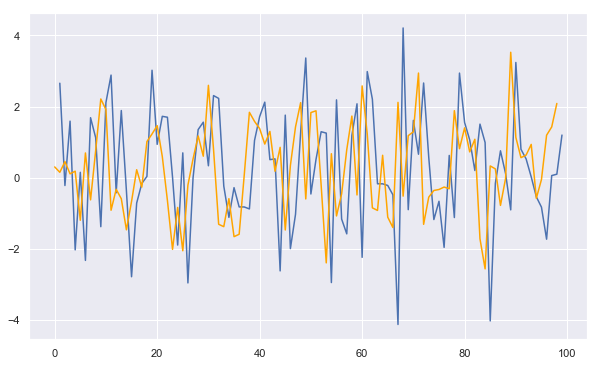

In [374]:
# AR+I+MA = ARIMA model
model = ARIMA(x, order=(5,1,1))
results_ARIMA = model.fit(disp=-1)

plt.figure(figsize=SIZE)
plt.plot(dx)
plt.plot(results_ARIMA.fittedvalues, color='orange')
plt.show()

In [375]:
# results_ARIMA.aic

In [376]:
# results_ARIMA.bic

In [377]:
# results_ARIMA.arfreq

In [378]:
# results_ARIMA.arparams

In [379]:
# results_ARIMA.arroots

In [380]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -148.518
Method:                       css-mle   S.D. of innovations              1.056
Date:                Thu, 13 Jun 2019   AIC                            313.035
Time:                        09:05:58   BIC                            333.796
Sample:                             1   HQIC                           321.435
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3031      0.015     20.158      0.000       0.274       0.333
ar.L1.D.y      0.1542      0.083      1.862      0.066      -0.008       0.317
ar.L2.D.y      0.0435      0.078      0.561      0.576      -0.109       0.196
ar.L3.D.y     -0.0302      0.077     -0.393      0.695      -0.181       0.120
ar.L4.D.y     -0.1834      0.078     -2.358      0.020      -0.336      -0.031
ar.L5.D.y     -0.6126      0.080     -7.646      0.000      -0.770      -0.456
ma.L1.D.y     -0.7843      0.066    -11.972      0.000      -0.913      -0.656
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8255           -0.6035j            1.0226           -0.1005
AR.2            0.8255           +0.6035j            1.0226            0.1005
AR.3           -1.1853           -0.0000j            1.1853           -0.5000
AR.4           -0.3826           -1.0819j            1.1476           -0.3041
AR.5           -0.3826           +1.0819j            1.1476            0.3041
MA.1            1.2750           +0.0000j            1.2750            0.0000
-----------------------------------------------------------------------------
"""

In [381]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -167.951
Method:                       css-mle   S.D. of innovations              1.305
Date:                Thu, 13 Jun 2019   AIC                            349.901
Time:                        09:06:00   BIC                            368.067
Sample:                             1   HQIC                           357.251
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2954      0.069      4.306      0.000       0.161       0.430
ar.L1.D.y     -0.1643      0.079     -2.081      0.040      -0.319      -0.010
ar.L2.D.y      0.0159      0.079      0.201      0.841      -0.139       0.170
ar.L3.D.y     -0.0230      0.078     -0.293      0.770      -0.177       0.131
ar.L4.D.y     -0.1821      0.079     -2.308      0.023      -0.337      -0.027
ar.L5.D.y     -0.5997      0.078     -7.658      0.000      -0.753      -0.446
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8478           -0.6832j            1.0888           -0.1079
AR.2            0.8478           +0.6832j            1.0888            0.1079
AR.3           -0.4405           -1.0314j            1.1215           -0.3142
AR.4           -0.4405           +1.0314j            1.1215            0.3142
AR.5           -1.1184           -0.0000j            1.1184           -0.5000
-----------------------------------------------------------------------------
"""

In [382]:
results_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -190.673
Method:                       css-mle   S.D. of innovations              1.660
Date:                Thu, 13 Jun 2019   AIC                            387.346
Time:                        09:06:01   BIC                            395.132
Sample:                             1   HQIC                           390.496
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2886      0.153      1.892      0.061      -0.010       0.588
ma.L1.D.y     -0.0870      0.099     -0.875      0.384      -0.282       0.108
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           11.4947           +0.0000j           11.4947            0.0000
-----------------------------------------------------------------------------
"""

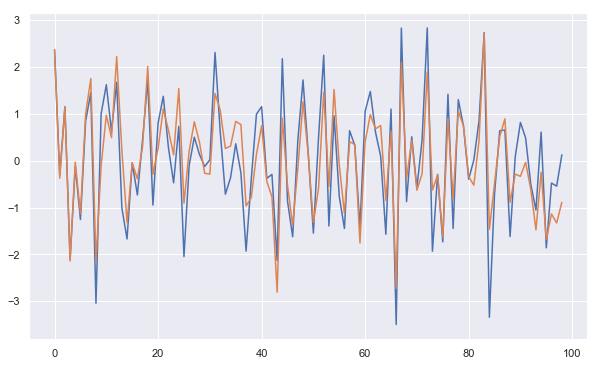

In [384]:
plt.figure(figsize=SIZE)
plt.plot(range(len(results_AR.resid)),results_AR.resid)
plt.plot(range(len(results_ARIMA.resid)),results_ARIMA.resid)
plt.show()

# Your Turn...

In [413]:
t = np.array(range(100))

x = 100 + t + np.sin(2*np.pi*t/10) \
  * t**.25 \
  * np.random.normal(5,3,100) 

# DESCRIPTION (of x):
# forcing some seasonality with a sinusoidal 
# adding a linear trend component 
# adding a non-linear trend component  
# injecting some noise  

df = pd.DataFrame(t, columns=['t'])
df['x'] = x

df['past'] = (df.t < 75).astype(np.int)
df['future'] = 1 - df.past

In [414]:
df.head()

,t,x,past,future
0,0,100.000000,1,0
1,1,105.741887,1,0
2,2,113.126705,1,0
3,3,102.615211,1,0
4,4,103.696433,1,0


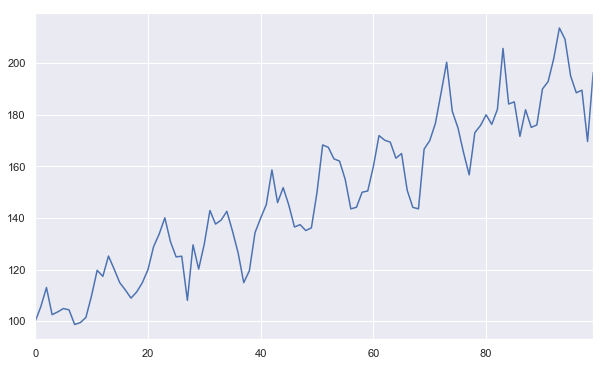

In [415]:
plt.figure(figsize=SIZE)
df['x'].plot()
plt.show()

In [ ]:
# Try to build a simple predictor for the 'future' part of our new dataset
# HINT: taking the log of the data could be useful at some point

# More to Come...